/var/folders/0t/74d45v7n0d3ctxylgpmyszrc0000gn/T/ipykernel_17022/1796846688.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['semaine'] = pd.to_datetime(df['semaine'])


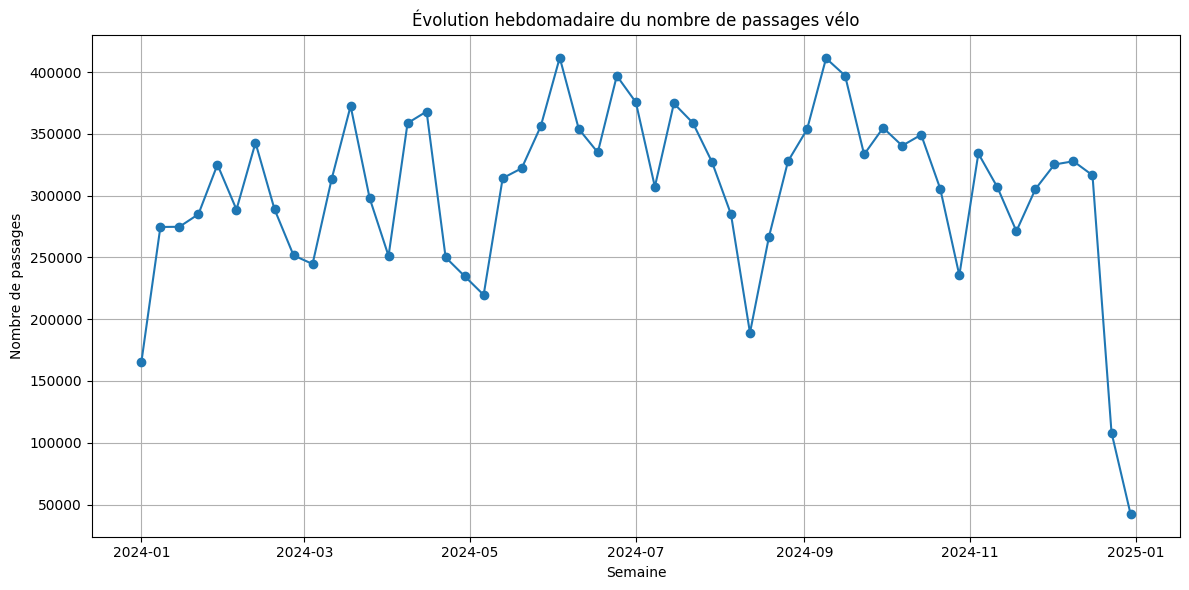

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/result1.csv')  # export depuis DBeaver
df['semaine'] = pd.to_datetime(df['semaine'])

plt.figure(figsize=(12,6))
plt.plot(df['semaine'], df['total_passages'], marker='o')
plt.title("Évolution hebdomadaire du nombre de passages vélo")
plt.xlabel("Semaine")
plt.ylabel("Nombre de passages")
plt.grid(True)
plt.tight_layout()
plt.show()


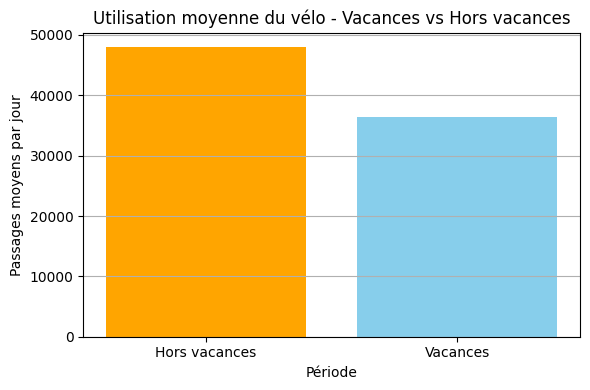

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/vacance_moyenne_jour.csv")

plt.figure(figsize=(6,4))
plt.bar(df["est_vacances"], df["moyenne_par_jour"], color=["orange", "skyblue"])
plt.title("Utilisation moyenne du vélo - Vacances vs Hors vacances")
plt.ylabel("Passages moyens par jour")
plt.xlabel("Période")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


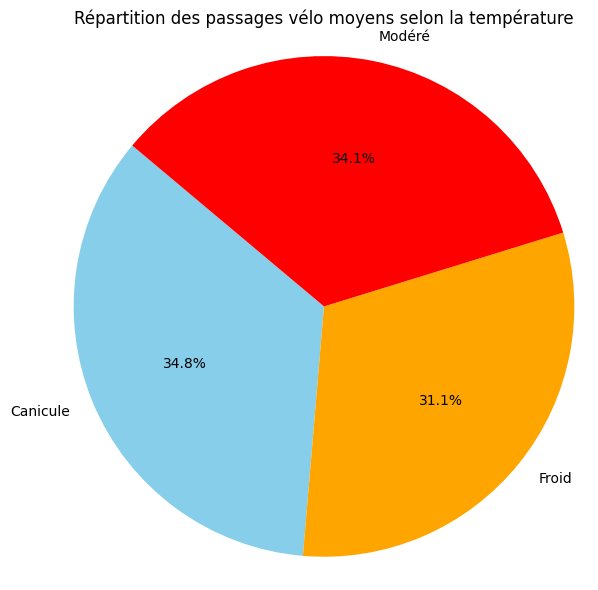

In [57]:
df = pd.read_csv("../data/temp_jour.csv")

plt.figure(figsize=(6,6))
plt.pie(
    df["moyenne_par_jour"],
    labels=df["temps"],
    autopct='%1.1f%%',
    colors=["skyblue", "orange", "red"],
    startangle=140
)
plt.title("Répartition des passages vélo moyens selon la température")
plt.axis('equal')  # Cercle parfait
plt.tight_layout()
plt.show()


/var/folders/0t/74d45v7n0d3ctxylgpmyszrc0000gn/T/ipykernel_17022/1462059176.py:57: UserWarning: Glyph 128690 (\N{BICYCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/nafyssata/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128690 (\N{BICYCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


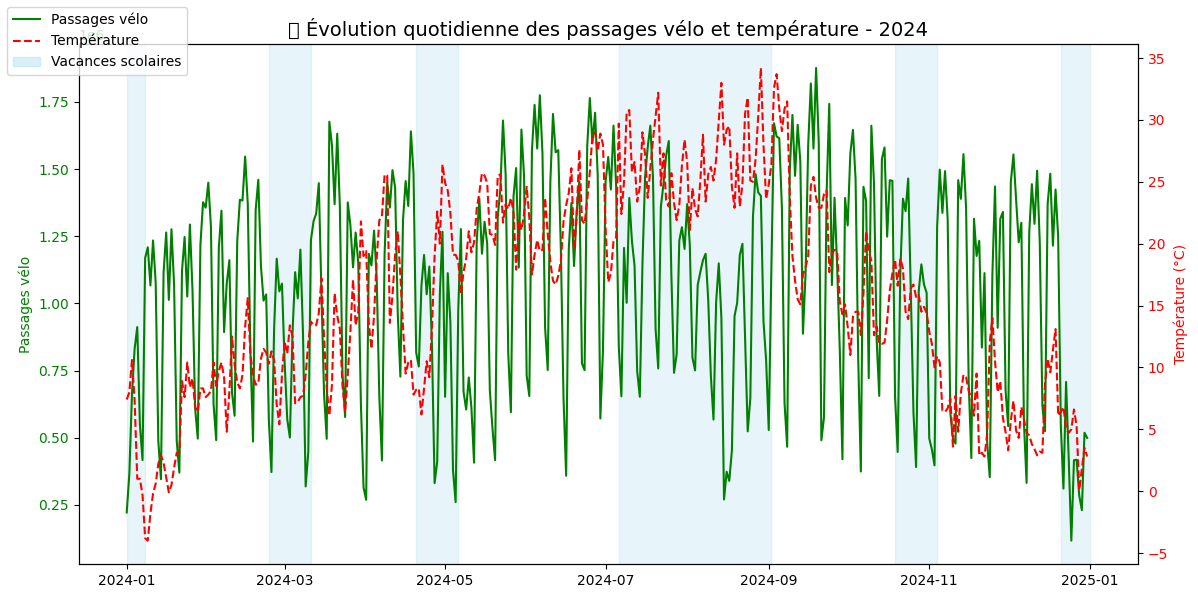

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from matplotlib.patches import Patch

# 📥 Charger les données
df = pd.read_csv("../data/suivi_daily.csv")
df['date'] = pd.to_datetime(df['date'])
df_week = df.resample('W-MON', on='date')[['passages_total', 'temperature']].mean().reset_index()

# 🔁 Créer colonne booléenne selon les vacances
df['is_vacances'] = df['est_vacances'] != "Hors vacances"

# 🔎 Repérer les plages continues de vacances
vac_ranges = []
in_vac = False
start_date = None

for i in range(len(df)):
    if df.loc[i, 'is_vacances'] and not in_vac:
        start_date = df.loc[i, 'date']
        in_vac = True
    elif not df.loc[i, 'is_vacances'] and in_vac:
        end_date = df.loc[i-1, 'date']
        vac_ranges.append((start_date, end_date))
        in_vac = False
if in_vac:
    vac_ranges.append((start_date, df.iloc[-1]['date']))

# 📊 Créer le graphique
fig, ax1 = plt.subplots(figsize=(12, 6))

# Courbe des passages vélo
line1, = ax1.plot(df['date'], df['passages_total'], color='green', label="Passages vélo")
ax1.set_ylabel("Passages vélo", color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Courbe secondaire : température
ax2 = ax1.twinx()
line2, = ax2.plot(df['date'], df['temperature'], color='red', linestyle='--', label="Température")
ax2.set_ylabel("Température (°C)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 🟦 Colorier les plages de vacances
for start, end in vac_ranges:
    ax1.axvspan(start, end + timedelta(days=1), color='skyblue', alpha=0.2)

# 🏷️ Ajouter une légende claire
fig.legend(handles=[
    line1, 
    line2,
    Patch(color='skyblue', alpha=0.3, label='Vacances scolaires')
], loc='upper left')

plt.title("🚲 Évolution quotidienne des passages vélo et température - 2024", fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [61]:
print(df.columns.tolist())


['est_vacances', 'date', 'passages_total', 'temperature', 'apparent_temperature', 'precipitation', 'wind_speed', 'wind_gusts', 'cloud_cover', 'is_rain', 'is_hot', 'is_cold', 'is_windy', 'is_grey', 'is_vacances']


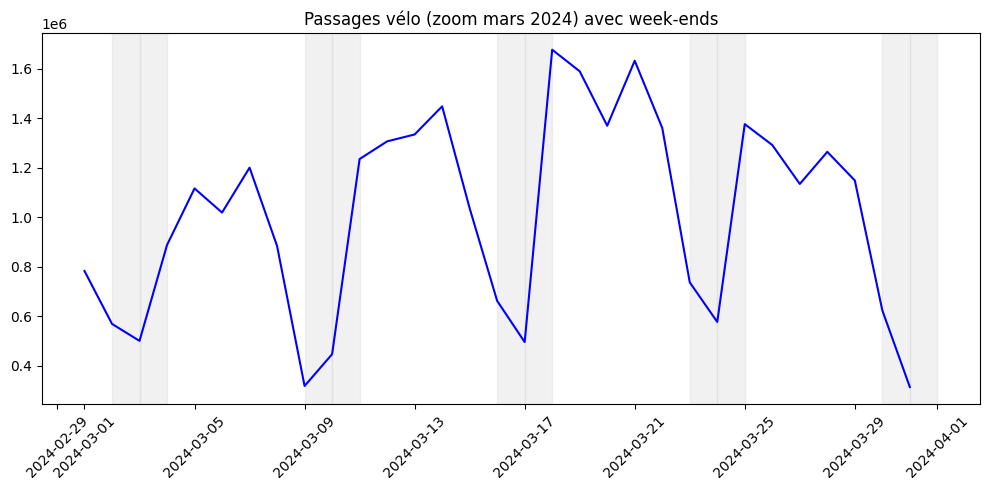

In [62]:
# Définir les bornes de la période souhaitée
debut = "2024-03-01"
fin = "2024-03-31"

# Filtrer le DataFrame
df_zoom = df[(df['date'] >= debut) & (df['date'] <= fin)]
df_zoom = df_zoom.reset_index(drop=True)


# Création du plot
fig, ax = plt.subplots(figsize=(10,5))

# Tracer les passages vélo
ax.plot(df_zoom['date'], df_zoom['passages_total'], color='blue')

# Colorier les week-ends
for date in df_zoom['date']:
    if date.weekday() >= 5:  # 5 = samedi, 6 = dimanche
        ax.axvspan(date, date + timedelta(days=1), color='lightgrey', alpha=0.3)

# Améliorer l'affichage des dates
plt.xticks(rotation=45)
plt.title("Passages vélo (zoom mars 2024) avec week-ends")
plt.tight_layout()
plt.show()



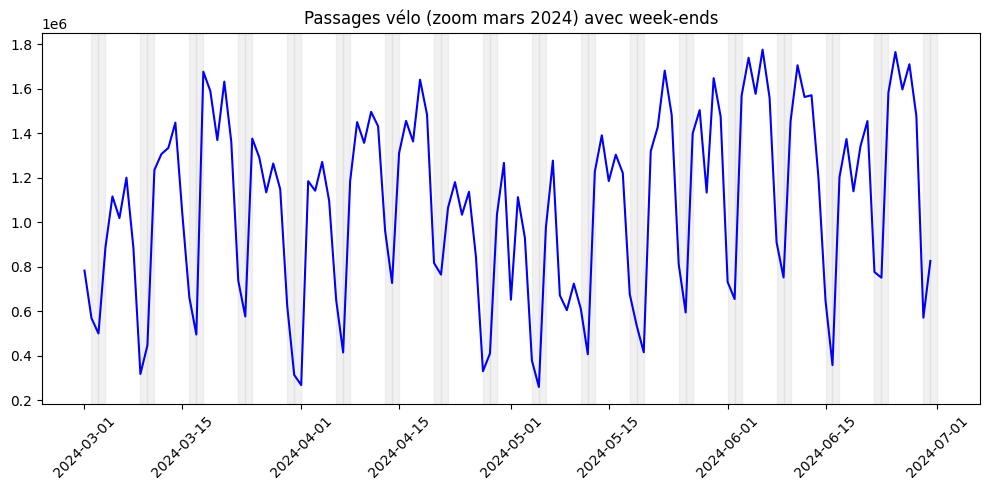

In [63]:
# Définir les bornes de la période souhaitée
debut = "2024-03-01"
fin = "2024-06-30"

# Filtrer le DataFrame
df_zoom = df[(df['date'] >= debut) & (df['date'] <= fin)]
df_zoom = df_zoom.reset_index(drop=True)


# Création du plot
fig, ax = plt.subplots(figsize=(10,5))

# Tracer les passages vélo
ax.plot(df_zoom['date'], df_zoom['passages_total'], color='blue')

# Colorier les week-ends
for date in df_zoom['date']:
    if date.weekday() >= 5:  # 5 = samedi, 6 = dimanche
        ax.axvspan(date, date + timedelta(days=1), color='lightgrey', alpha=0.3)

# Améliorer l'affichage des dates
plt.xticks(rotation=45)
plt.title("Passages vélo (zoom mars 2024) avec week-ends")
plt.tight_layout()
plt.show()



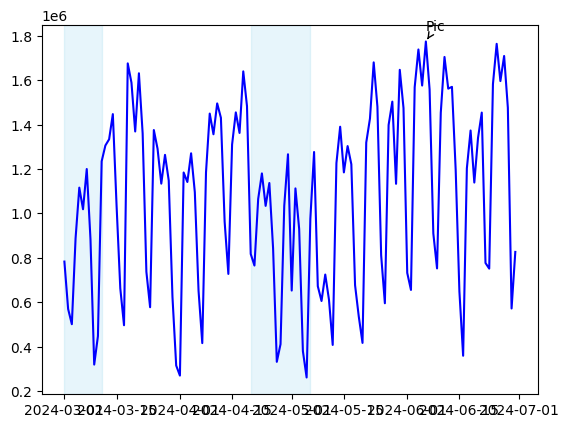

In [64]:
# Ajouter les vacances (si tu as une colonne est_vacances dans df_zoom)
from datetime import timedelta

# Créer une colonne booléenne
df_zoom['is_vacances'] = df_zoom['est_vacances'] != "Hors vacances"

# Identifier les plages continues de vacances
vac_ranges = []
in_vac = False
start = None

for i in range(len(df_zoom)):
    if df_zoom.loc[i, 'is_vacances'] and not in_vac:
        start = df_zoom.loc[i, 'date']
        in_vac = True
    elif not df_zoom.loc[i, 'is_vacances'] and in_vac:
        end = df_zoom.loc[i-1, 'date']
        vac_ranges.append((start, end))
        in_vac = False
if in_vac:
    vac_ranges.append((start, df_zoom.iloc[-1]['date']))

# Dessiner les zones de vacances
for start, end in vac_ranges:
    plt.axvspan(start, end + timedelta(days=1), color='skyblue', alpha=0.2)
top = df_zoom.sort_values(by="passages_total", ascending=False).head(1)
for _, row in top.iterrows():
    plt.annotate("Pic", xy=(row['date'], row['passages_total']), xytext=(row['date'], row['passages_total']+50000),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.plot(df_zoom['date'], df_zoom['passages_total'], color='blue', label='Passages vélo')


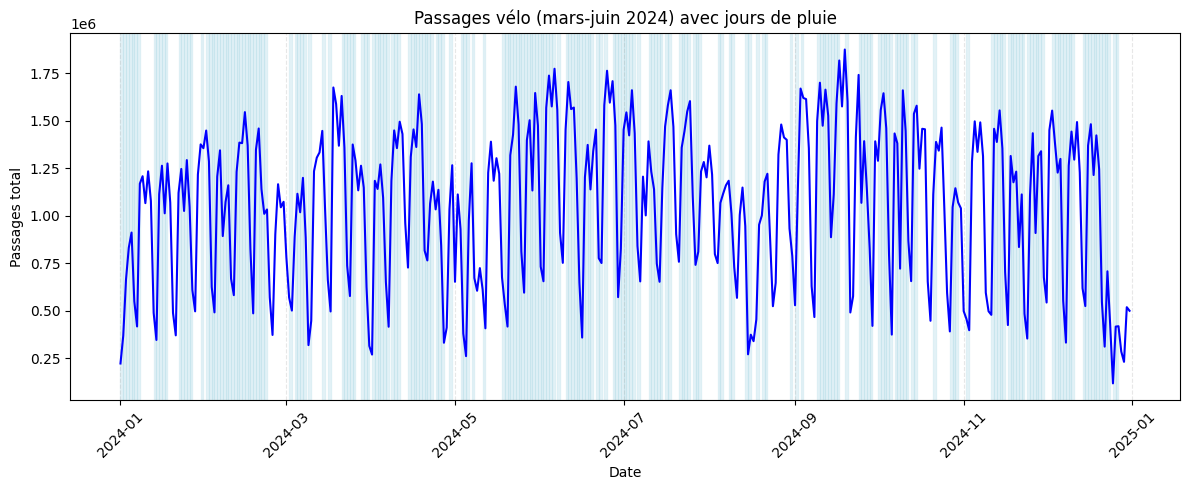

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta

# On suppose que tu as déjà :
# - chargé df
# - converti 'date' avec pd.to_datetime()
# - zoomé sur la période
# - filtré dans df_zoom

# ➕ On garde uniquement les jours pluvieux
jours_pluie = df[df['is_rain'] == True]

# 🔍 Affichage avec fond bleu les jours de pluie
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['passages_total'], color='blue')

for _, row in jours_pluie.iterrows():
    plt.axvspan(row['date'], row['date'] + timedelta(days=1), color='lightblue', alpha=0.3)

plt.title("Passages vélo (mars-juin 2024) avec jours de pluie")
plt.xlabel("Date")
plt.ylabel("Passages total")
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


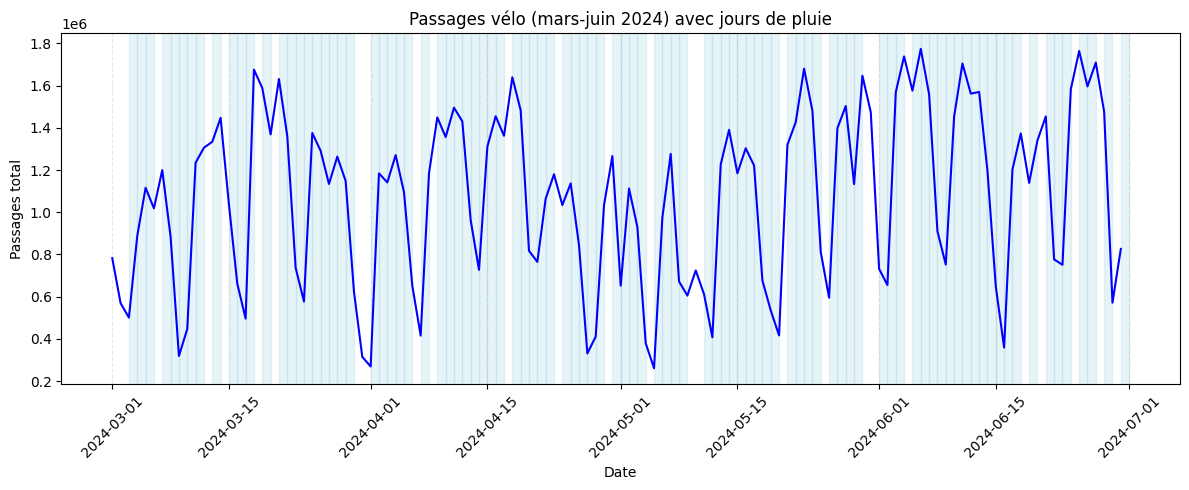

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta

# On suppose que tu as déjà :
# - chargé df
# - converti 'date' avec pd.to_datetime()
# - zoomé sur la période
# - filtré dans df_zoom

# ➕ On garde uniquement les jours pluvieux
jours_pluie = df_zoom[df_zoom['is_windy'] == True]

# 🔍 Affichage avec fond bleu les jours de pluie
plt.figure(figsize=(12, 5))
plt.plot(df_zoom['date'], df_zoom['passages_total'], color='blue')

for _, row in jours_pluie.iterrows():
    plt.axvspan(row['date'], row['date'] + timedelta(days=1), color='lightblue', alpha=0.3)

plt.title("Passages vélo (mars-juin 2024) avec jours de pluie")
plt.xlabel("Date")
plt.ylabel("Passages total")
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [70]:
pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 44.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 46.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


2025-04-21 02:03:36.772 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 02:03:36.772 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 02:03:36.773 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 02:03:36.773 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 02:03:36.796 
  command:

    streamlit run /Users/nafyssata/Library/Python/3.13/lib/python/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-04-21 02:03:36.797 Thread 'MainThread': missing ScriptRunContext! This warning c

DeltaGenerator()

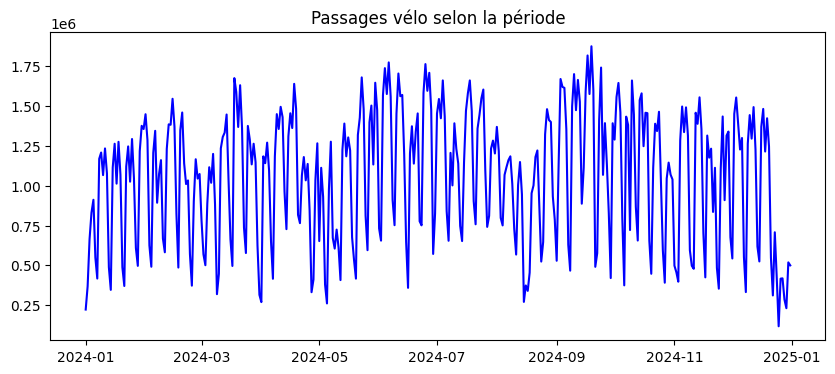

In [73]:
# app.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/suivi_daily.csv")
df['date'] = pd.to_datetime(df['date'])

# Filtres
date_range = st.slider(
    "Choisir la période",
    min_value=df['date'].min().date(),
    max_value=df['date'].max().date(),
    value=(df['date'].min().date(), df['date'].max().date())
)

df_filtered = df[
    (df['date'] >= pd.to_datetime(date_range[0])) &
    (df['date'] <= pd.to_datetime(date_range[1]))
]

# Graphique
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df_filtered['date'], df_filtered['passages_total'], label='Passages vélo', color='blue')
ax.set_title("Passages vélo selon la période")
st.pyplot(fig)
